In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv('files_for_lab/customer_value_analysis.csv')

In [3]:
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
# No duplicated rows
customer_df.loc[customer_df.duplicated() == True]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


In [5]:
# No NA rows
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
customer_df.shape

(9134, 24)

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
def column_renamer(df):
    """This function will use the lamba function to first iterate through all column names to bring them to lowercase, and then replace all spaces with _underscores_
    and renames st column to state before returning the updated dataframe."""
    df.columns = [x.lower() for x in df.columns]
    df.columns = df.columns.str.replace(' ', '_')
    return df

In [10]:
customer_df = column_renamer(customer_df)

In [11]:
# looking for ID columns
customer_df.columns
# customer is only ID column that I can identify
customer_df.drop(columns=['customer'], inplace=True)

In [12]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

/var/folders/y3/f9twdr796bj91_x22w2_mf2h0000gn/T/ipykernel_83223/791879803.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [13]:
def cat_and_num_df_splitter(df: pd.DataFrame):
    """
    Function: Splits dataframe into a categorical and numerical dataframes
    Inputs: pandas DataFrame
    Outputs: A categorical dataframe and a numerical dataframe
    """
    df2 = df.copy()
    num_df = df2.select_dtypes(np.number)
    cat_df = df2.select_dtypes(object)
    return cat_df, num_df

In [14]:
categorical_df, numerical_df = cat_and_num_df_splitter(customer_df)

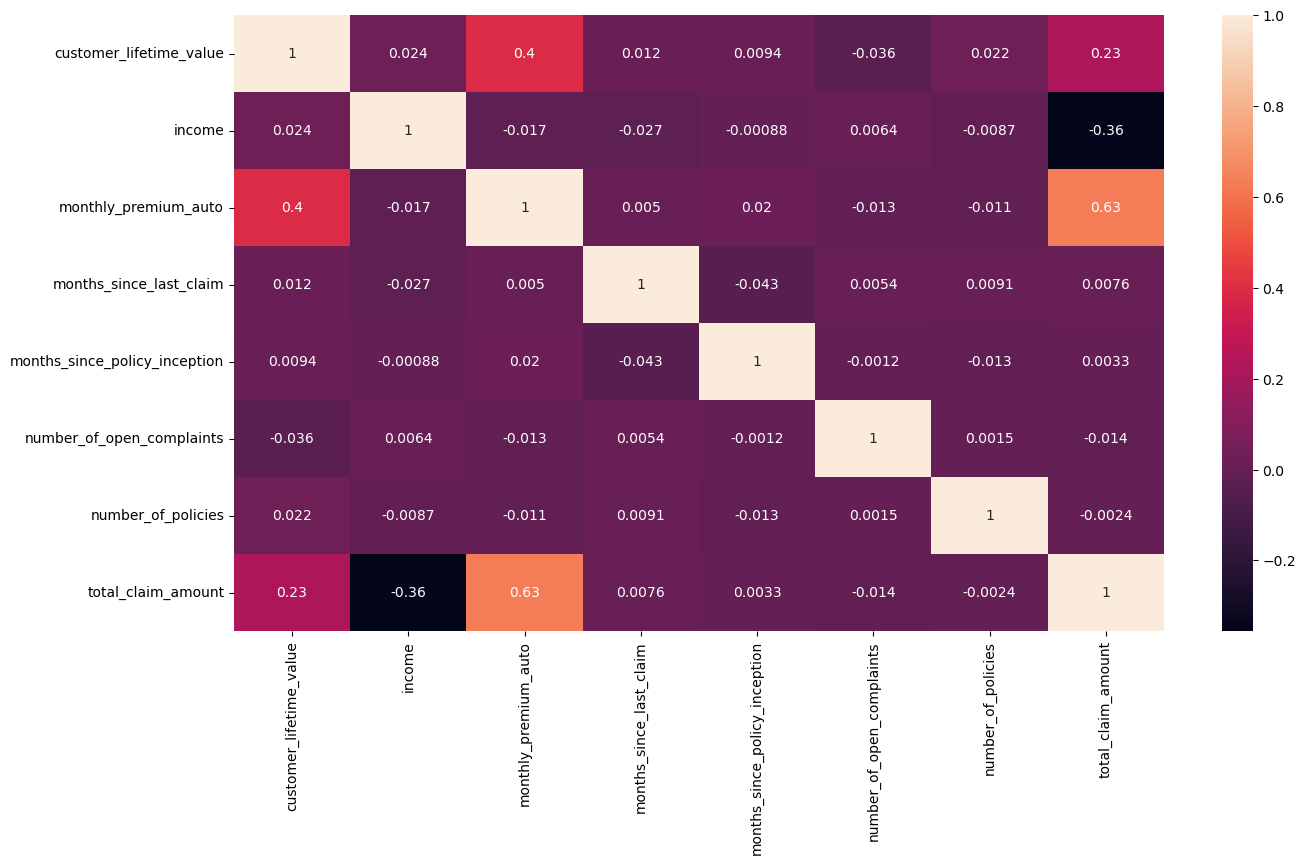

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

# pair of numerical variables with highest correlation is total_claim_amount
# and monthly_premium_auto. Traditionally if you make higher claims, your
# monthly premiums would also increase, meaning total_claim_amount would
# impact your monthly_premiums. 

In [16]:
def numerical_continuous_discrete_df_splitter(df: pd.DataFrame, unique_value_threshold=36):
    df2 = df.copy()
    df2_discrete = df.copy()
    df2_contin = df.copy()
    for col in df2.columns:
        nunique_values = df2[col].nunique()
        if nunique_values > unique_value_threshold:
            df2_discrete = df2_discrete.drop(columns=[col])
        else:
            df2_contin = df2_contin.drop(columns=[col])
    return df2_discrete, df2_contin

In [17]:
discrete_df, continuous_df = numerical_continuous_discrete_df_splitter(numerical_df)

In [18]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


In [19]:
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [20]:
def discrete_df_barplot(df: pd.DataFrame):
    fig, ax = plt.subplots(len(df.columns), 1, figsize=(16,16))
    i = 0
    for col in df.columns:
        sns.barplot(data=df, y=df[col].value_counts().values,
                    x=df[col].value_counts().index ,ax=ax[i])
        ax[i].set_title(col)
        i += 1
    plt.show()

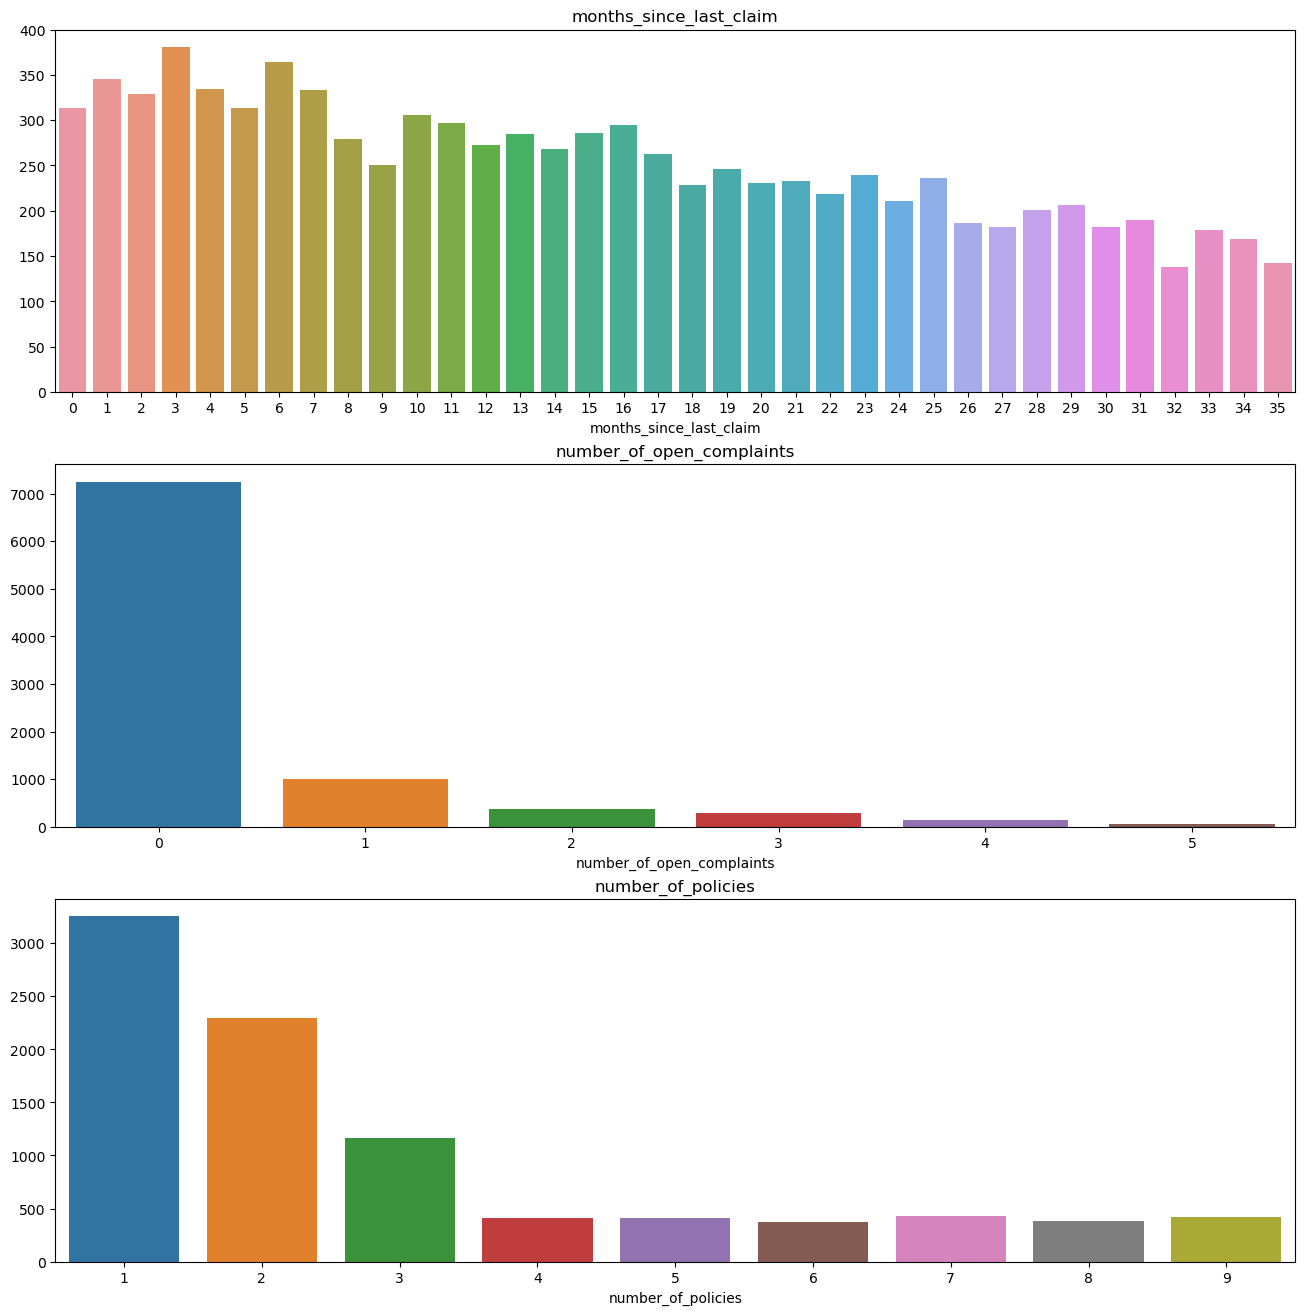

In [21]:
discrete_df_barplot(discrete_df)

In [22]:
def continuous_df_histplot(df: pd.DataFrame):
    fig, ax = plt.subplots(len(df.columns), 1, figsize=(16,20))
    i = 0
    for col in df.columns:
        sns.histplot(df[col] ,ax=ax[i], kde=True)
        i += 1
    plt.show()

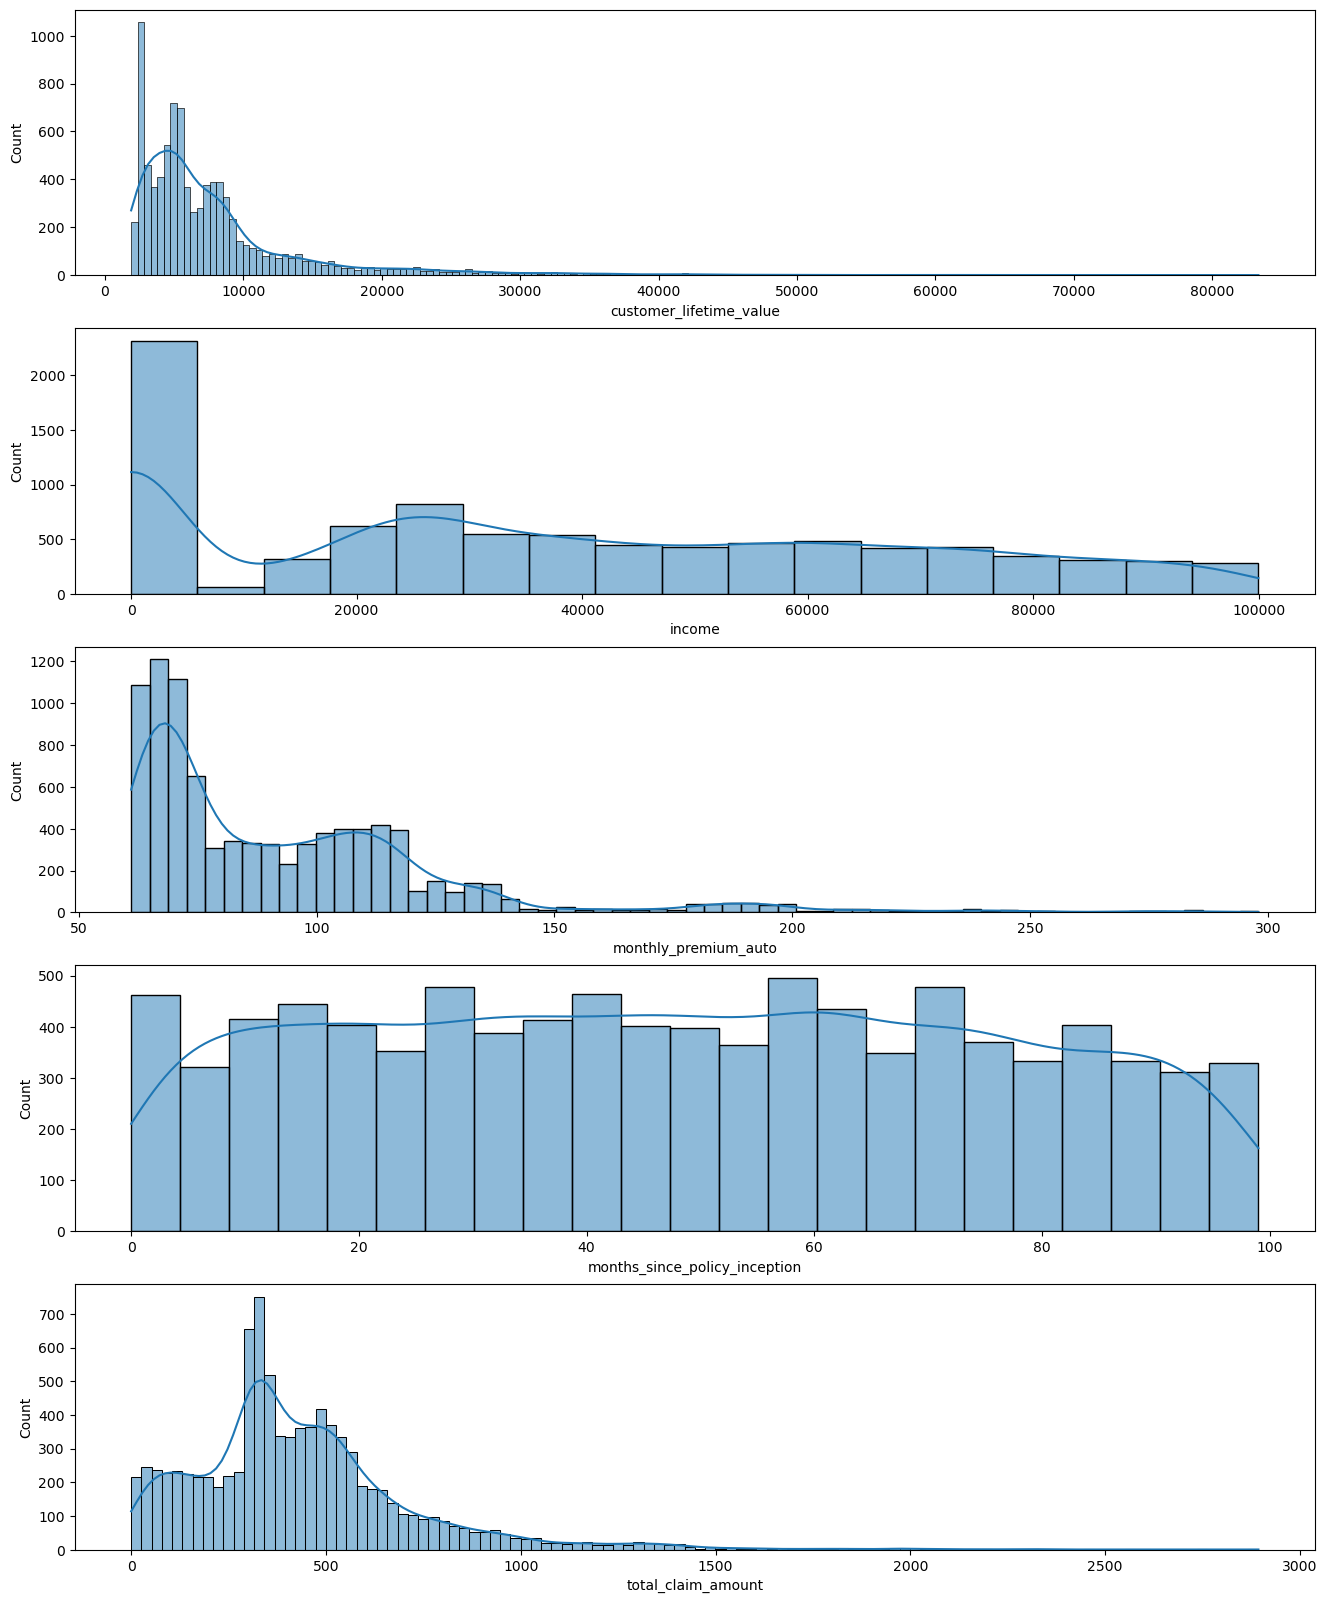

In [23]:
continuous_df_histplot(continuous_df)

In [24]:
# Looking at the histogram plots, I would recommend a log transformation for
# CLV, monthly_premium_auto and total_claim_amount to try and standardise into
# a normal distribution. The same could be said for income. 

In [25]:
def boxplot_continuous_df(df:pd.DataFrame):
    fig, ax = plt.subplots(len(df.columns), 1, figsize=(16,16))
    i = 0
    for col in df.columns:
        sns.boxplot(x=df[col], ax=ax[i])
        i += 1
    plt.show()
    

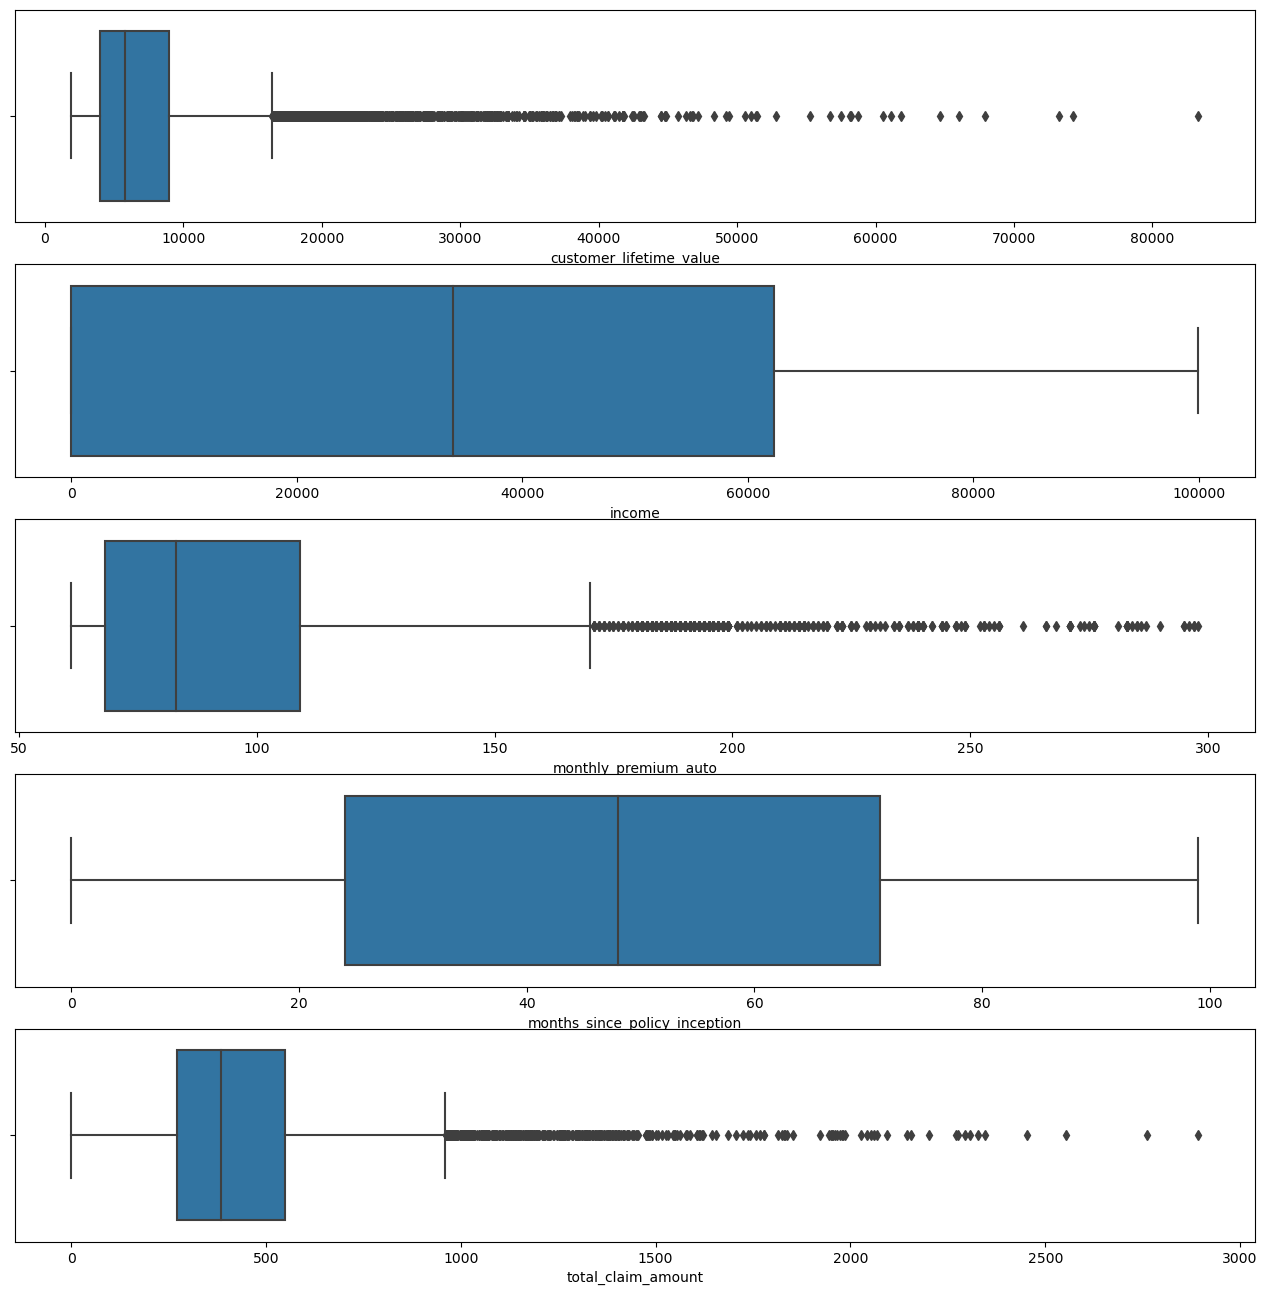

In [26]:
boxplot_continuous_df(continuous_df)

In [27]:
# Extreme outliers in total_claim_amount, monthly_premium_auto and CLV.

# Lab Cleaning Categorical Data

In [28]:
def countplot_cat_df(df: pd.DataFrame):
    fig, ax = plt.subplots(len(df.columns),1, figsize=(8,45))
    i = 0
    for col in df.columns:
        sns.countplot(data=df, x=col, ax=ax[i])
        i += 1
    plt.show()

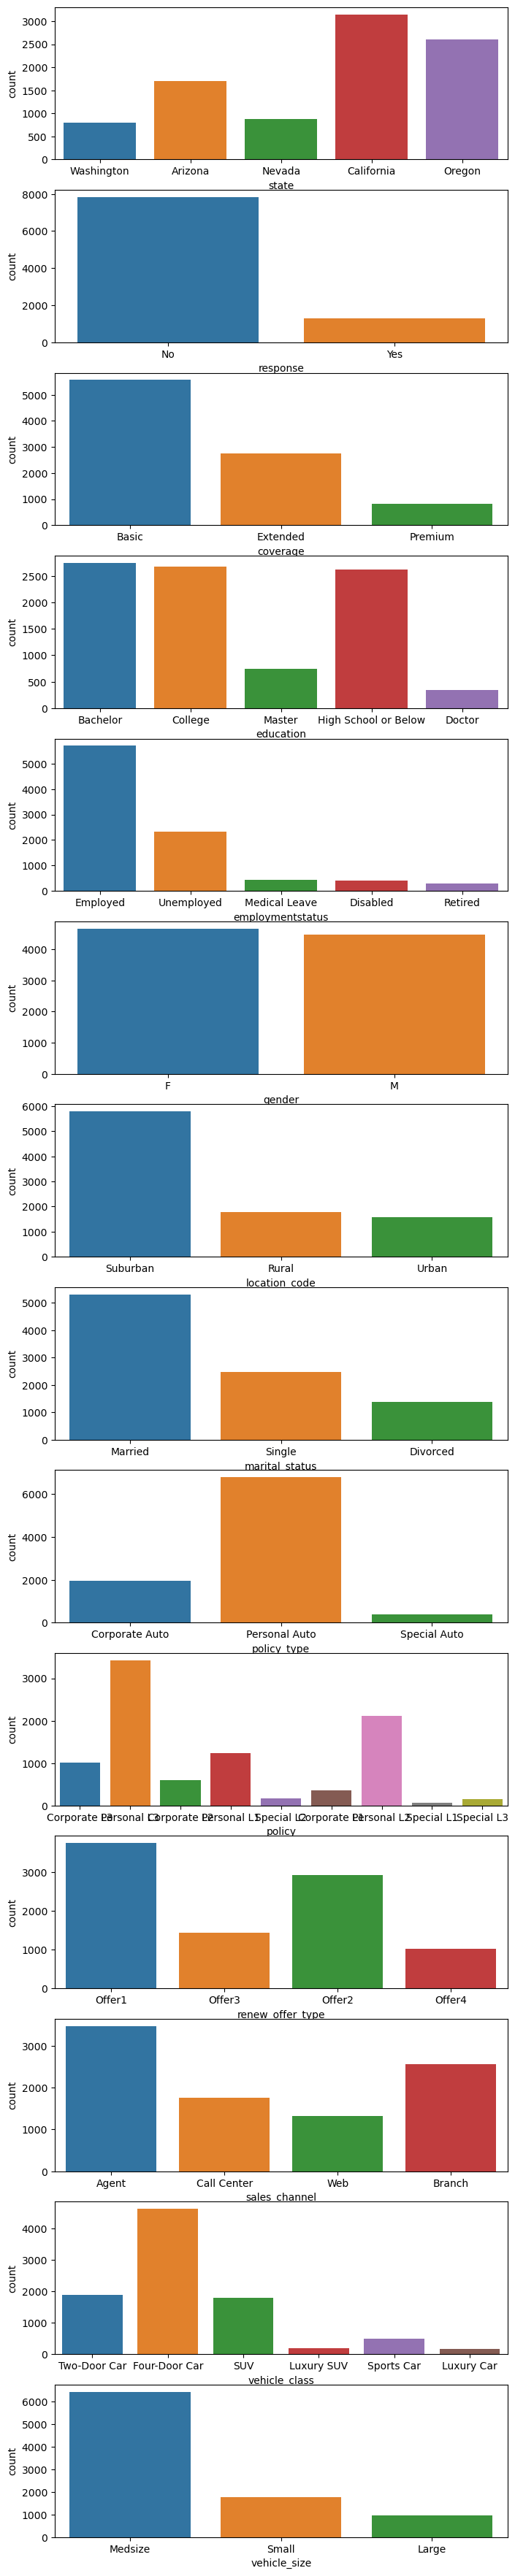

In [29]:
countplot_cat_df(categorical_df)

In [30]:
categorical_df.drop(columns=['policy_type'])

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large


In [31]:
# Groupping states in regions
def clean_policy(policy: str) -> str:
    '''
    This function determine to which policy belongs a policy level grouping

    Input:
    policy: str

    Output:
    Region to which the state belongs. If the state is not found it returns "Other"
    '''

    policies = {"L1": ["Personal L1","Corporate L1","Special L1"],
              "L2": ["Personal L2","Corporate L2","Special L2"],
              "L3": ["Personal L3","Corporate L3","Special L3"] }

    new_policy = [ key for key, value in policies.items() if policy in value ]

    if ( len(new_policy) != 0):
        return new_policy[0]
    

# Here our cleaning function contains two inputs. Therefore, we can't use .apply directly.
categorical_df['policy'] = categorical_df['policy'].apply(clean_policy)
categorical_df['policy'].value_counts()

policy
L3    4588
L2    2881
L1    1665
Name: count, dtype: int64

In [32]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [33]:
display(categorical_df.info())
display(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             9134 non-null   object
 1   response          9134 non-null   object
 2   coverage          9134 non-null   object
 3   education         9134 non-null   object
 4   employmentstatus  9134 non-null   object
 5   gender            9134 non-null   object
 6   location_code     9134 non-null   object
 7   marital_status    9134 non-null   object
 8   policy_type       9134 non-null   object
 9   policy            9134 non-null   object
 10  renew_offer_type  9134 non-null   object
 11  sales_channel     9134 non-null   object
 12  vehicle_class     9134 non-null   object
 13  vehicle_size      9134 non-null   object
dtypes: object(14)
memory usage: 999.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premium_a

None

In [34]:
total_claim_vs_date_df = customer_df.groupby(
    'effective_to_date')['total_claim_amount'].sum().reset_index()

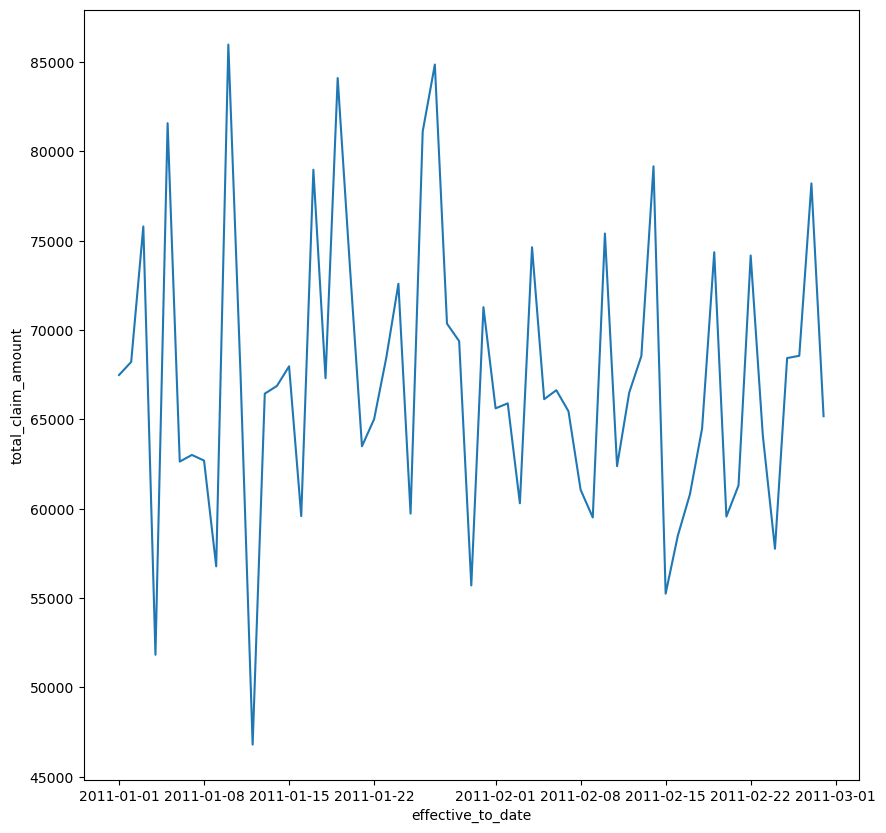

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=total_claim_vs_date_df, x='effective_to_date',
            y='total_claim_amount')
plt.show()

In [36]:
df_columns=['day', 'day_name', 'week', 'month', 'total_claim_amount']
day = customer_df['effective_to_date'].dt.day
day_name = customer_df['effective_to_date'].dt.day_name()
week = customer_df['effective_to_date'].dt.isocalendar().week
month = customer_df['effective_to_date'].dt.month_name()
date = customer_df['effective_to_date']
total_claim_amount = customer_df['total_claim_amount']

In [37]:
d = {'day':day, 'day_name':day_name, 'week':week, 'month':month, 'date':date,
    'total_claim_amount':total_claim_amount}
date_target_df = pd.DataFrame(data=d)

In [38]:
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                        'Friday', 'Saturday', 'Sunday']
day_name_grouped_target = date_target_df.groupby(day_name)[
    'total_claim_amount'].sum().reindex(index=list_of_correct_days).reset_index()
day_name_grouped_target['total_claim_amount'] = round(day_name_grouped_target[
    'total_claim_amount'], 2)
day_name_grouped_target

,effective_to_date,total_claim_amount
0,Monday,655689.71
1,Tuesday,502518.93
2,Wednesday,541563.05
3,Thursday,541820.80
4,Friday,533658.79
5,Saturday,608060.10
6,Sunday,581655.66


<Axes: xlabel='effective_to_date', ylabel='total_claim_amount'>

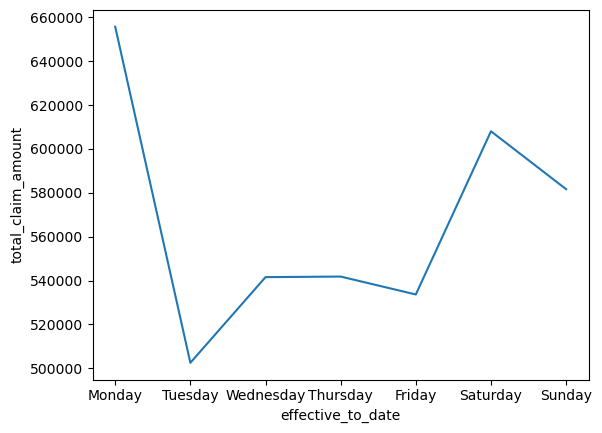

In [39]:
sns.lineplot(data=day_name_grouped_target, x='effective_to_date', 
             y='total_claim_amount')
# Mondays had the highest sum of claims submitted, whilst Tuesdays had the lowest
# Claim sums then increase throughout the week.

In [40]:
month_grouped_target = date_target_df.groupby('month')[
    'total_claim_amount'].sum().reindex(index=['January', 'February']).reset_index()
month_grouped_target['total_claim_amount'] = round(month_grouped_target['total_claim_amount'], 2)

<Axes: xlabel='month', ylabel='total_claim_amount'>

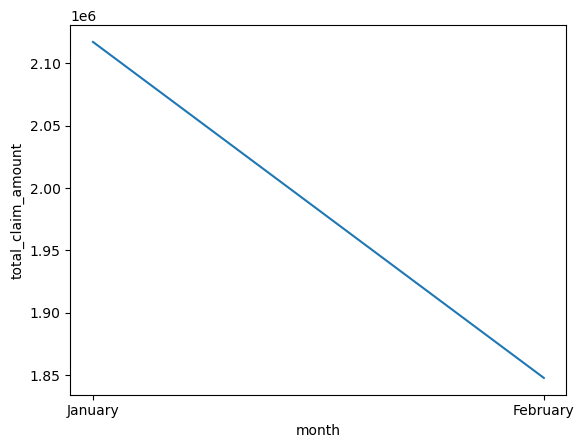

In [41]:
sns.lineplot(data=month_grouped_target, 
             x='month', y='total_claim_amount')
# Not enough months to be able to do analysis on this series of data.  

In [42]:
def outlier_removal(df: pd.DataFrame, threshold: int=3):
    """
    Function: Remove outliers that are more or less than threshold * standard deviation from a continuous numerical df columns
    Inputs: dataframe, column name to check for outliers, threshold to multiply std by for outlier detection, default is 3.
    Outputs: Dataframe with outliers removed based on threshold
    """
    df2 = df.copy()
    for col in df2.columns:
        mean = df2[col].mean()
        std = df2[col].std()
        df2 = df2.loc[(df2[col] > (mean - threshold*std)) & (df2[col] < (mean + threshold*std))]
    return df2

In [43]:
continuous_cleaned_df = outlier_removal(continuous_df)
continuous_cleaned_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [44]:
time_df = date_target_df[['date']]

In [45]:
concatenated_df = pd.concat([continuous_cleaned_df, 
           discrete_df, categorical_df, time_df], axis=1)

In [46]:
concatenated_df.dropna(inplace=True)
concatenated_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,date
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-24
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize,2011-01-31
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-19
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize,2011-01-20
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941.0,73.0,89.0,198.234764,18,0,2,California,No,...,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize,2011-02-10
9130,3096.511217,21604.0,79.0,28.0,379.200000,14,0,1,California,Yes,...,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize,2011-02-12
9131,8163.890428,0.0,85.0,37.0,790.784983,9,3,2,California,No,...,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize,2011-02-06
9132,7524.442436,21941.0,96.0,3.0,691.200000,34,0,3,California,No,...,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large,2011-02-03


In [47]:
concatenated_df = concatenated_df.reset_index().drop(columns='index')

In [48]:
# putting total_claim_amount to end column position.
concatenated_df = concatenated_df[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'date',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'total_claim_amount']]

In [49]:
concatenated_df['response'] = np.where(concatenated_df['response'] == "Yes", 1, 0)

concatenated_df['response'].value_counts()

response
0    7339
1    1236
Name: count, dtype: int64

In [50]:
concatenated_df['education'] = np.where(concatenated_df['education'].isin([
    'Master', 'Doctor']), "Graduate", concatenated_df['education'])
concatenated_df['education'].value_counts()

education
Bachelor                2585
College                 2531
High School or Below    2441
Graduate                1018
Name: count, dtype: int64

In [51]:
concatenated_df['employmentstatus'] = np.where(concatenated_df['employmentstatus'].isin(
['Medical Leave', 'Disabled', 'Retired']), 'Inactive', concatenated_df['employmentstatus'])
concatenated_df['employmentstatus'].value_counts()

employmentstatus
Employed      5384
Unemployed    2127
Inactive      1064
Name: count, dtype: int64

In [52]:
# Cast male into 1, female into 0
concatenated_df['gender'] = np.where(concatenated_df['gender'] == 'M', 1, 0)
concatenated_df['gender'].value_counts()

gender
0    4383
1    4192
Name: count, dtype: int64

In [53]:
concatenated_df['vehicle_class'] = np.where(concatenated_df['vehicle_class'].isin(
['Sports Car', 'Luxury SUV', 'Luxury Car']), 'Luxury', concatenated_df['vehicle_class'])
concatenated_df['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    4577
Two-Door Car     1869
SUV              1627
Luxury            502
Name: count, dtype: int64

In [54]:
def ordinal_column_encoder(df: pd.DataFrame, col: str, values: dict):
    """
    Function: Encode a column of a dataframe based on a dictionary with keys and values provided in values.
    Input: dataframe, column name, dict with keys and values to encode
    Output: Updated df with encoded column
    """
    df2 = df.copy()
    df2 = df2.replace({col:values})
    return df2

In [55]:
values_employment = {'Employed': 2,
                  'Inactive': 1, 
                  'Unemployed':0}

values_coverage = {'Basic':0,
                  'Extended':1,
                  'Premium':2}

values_location = {'Rural':0, 
                  'Suburban': 1,
                  'Urban':2}

values_vehicle = {'Small':0,
                 'Medsize':1,
                 'Large':2}

values_gender = {'F':0,
                'M':1}

values_response = {'Yes': 1,
                  'No': 0}

values_list_ordinal = [values_employment, values_coverage, 
                       values_location, values_vehicle,
                      values_gender, values_response]

In [56]:
def multiple_ordinal_column_encoder(df: pd.DataFrame, cols:list, values_list: list):
    """
    Function: Encodes inputted dataframe assuming all columns to be ordinally encoded have had list of keys and values to encode provded in values_list.
    Inputs: dataframe, list of columns to encode with accompanying and ordered list of dictionaries in values_list.
    Output: dataframe with ordinal categorical columns encoded. 
    """
    df2 = df.copy()
    if len(cols) == len(values_list):
        for i in range(len(values_list)):
            df2 = ordinal_column_encoder(df2, cols[i], values_list[i])
    else:
        print("list of columns should match with length of values_list")
        print(len(cols), len(values_list))
    return df2

In [57]:
ordinal_column_encoder(concatenated_df, 'employmentstatus', values_employment)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,date,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,2011-02-24,32,0,1,Washington,0,...,0,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,6979.535903,0.0,94.0,42.0,2011-01-31,13,0,8,Arizona,0,...,0,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,12887.431650,48767.0,108.0,38.0,2011-02-19,18,0,2,Nevada,0,...,0,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,7645.861827,0.0,106.0,65.0,2011-01-20,18,0,7,California,0,...,1,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize,529.881344
4,2813.692575,43836.0,73.0,44.0,2011-02-03,12,0,1,Washington,0,...,1,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,2011-02-10,18,0,2,California,0,...,1,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize,198.234764
8571,3096.511217,21604.0,79.0,28.0,2011-02-12,14,0,1,California,1,...,0,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize,379.200000
8572,8163.890428,0.0,85.0,37.0,2011-02-06,9,3,2,California,0,...,1,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize,790.784983
8573,7524.442436,21941.0,96.0,3.0,2011-02-03,34,0,3,California,0,...,1,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large,691.200000


In [58]:
column_list = ['employmentstatus','coverage','location_code', 
               'vehicle_size', 'gender', 'response']

In [59]:
concatenated_df = multiple_ordinal_column_encoder(concatenated_df, 
                                column_list, 
                                values_list_ordinal)
concatenated_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,date,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,2011-02-24,32,0,1,Washington,0,...,0,1,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,1,384.811147
1,6979.535903,0.0,94.0,42.0,2011-01-31,13,0,8,Arizona,0,...,0,1,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,1,1131.464935
2,12887.431650,48767.0,108.0,38.0,2011-02-19,18,0,2,Nevada,0,...,0,1,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,1,566.472247
3,7645.861827,0.0,106.0,65.0,2011-01-20,18,0,7,California,0,...,1,1,Married,Corporate Auto,L2,Offer1,Call Center,SUV,1,529.881344
4,2813.692575,43836.0,73.0,44.0,2011-02-03,12,0,1,Washington,0,...,1,0,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,2011-02-10,18,0,2,California,0,...,1,2,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,1,198.234764
8571,3096.511217,21604.0,79.0,28.0,2011-02-12,14,0,1,California,1,...,0,1,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,1,379.200000
8572,8163.890428,0.0,85.0,37.0,2011-02-06,9,3,2,California,0,...,1,1,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,1,790.784983
8573,7524.442436,21941.0,96.0,3.0,2011-02-03,34,0,3,California,0,...,1,1,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,2,691.200000


In [60]:
concatenated_df[categorical_df.columns]

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,0,0,Bachelor,2,0,1,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,1
1,Arizona,0,1,Bachelor,0,0,1,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,1
2,Nevada,0,2,Bachelor,2,0,1,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,1
3,California,0,0,Bachelor,0,1,1,Married,Corporate Auto,L2,Offer1,Call Center,SUV,1
4,Washington,0,0,Bachelor,2,1,0,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,California,0,0,Bachelor,2,1,2,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,1
8571,California,1,1,College,2,0,1,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,1
8572,California,0,1,Bachelor,0,1,1,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,1
8573,California,0,1,College,2,1,1,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,2


In [61]:
nominal_columns = ['state', 'education', 'marital_status', 'policy_type',
                  'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']

In [62]:
categorical_nominal_df = concatenated_df[nominal_columns]

In [63]:
levels = []
for col in categorical_nominal_df.columns:
    col_list = list(pd.get_dummies(categorical_nominal_df[[col]]).columns)
    levels.append(col_list)
    
print(levels)

[['state_Arizona', 'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington'], ['education_Bachelor', 'education_College', 'education_Graduate', 'education_High School or Below'], ['marital_status_Divorced', 'marital_status_Married', 'marital_status_Single'], ['policy_type_Corporate Auto', 'policy_type_Personal Auto', 'policy_type_Special Auto'], ['policy_L1', 'policy_L2', 'policy_L3'], ['renew_offer_type_Offer1', 'renew_offer_type_Offer2', 'renew_offer_type_Offer3', 'renew_offer_type_Offer4'], ['sales_channel_Agent', 'sales_channel_Branch', 'sales_channel_Call Center', 'sales_channel_Web'], ['vehicle_class_Four-Door Car', 'vehicle_class_Luxury', 'vehicle_class_SUV', 'vehicle_class_Two-Door Car']]


In [64]:

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', categories = levels)

--- 
# Lab Comparing Regression Models

In [65]:
X = concatenated_df.drop(columns=['total_claim_amount'])
y = concatenated_df['total_claim_amount']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=31)

In [67]:
X_train_cat = X_train.select_dtypes(object)
X_train_num = X_train.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)

In [68]:
ohe = OneHotEncoder(drop='first')

X_train_cat_enc = ohe.fit_transform(X_train_cat).toarray()
X_test_cat_enc = ohe.transform(X_test_cat).toarray()

features = ohe.get_feature_names_out()

X_train_cat_enc_df = pd.DataFrame(X_train_cat_enc, columns=features, index=X_train_cat.index) 
X_test_cat_enc_df = pd.DataFrame(X_test_cat_enc, columns=features, index=X_test_cat.index) 
X_train_cat_enc_df.head()

,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_Graduate,education_High School or Below,marital_status_Married,marital_status_Single,policy_type_Personal Auto,...,policy_L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
7257,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5720,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3063,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8478,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()

transformer.fit(X_train_num)

X_train_num_trans = transformer.transform(X_train_num)
X_test_num_trans = transformer.transform(X_test_num)

X_train_num_transformed_df = pd.DataFrame(X_train_num_trans, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df = pd.DataFrame(X_test_num_trans, columns=X_train_num.columns, index=X_test_num.index )

X_train_num_transformed_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,gender,location_code,vehicle_size
7257,1.254780,-1.662875,1.312075,-0.403151,-0.698167,-0.508609,-0.066679,-0.403674,1.205715,-1.532154,1.017820,0.037153,0.152432
5720,-1.502490,0.235429,-1.144354,1.275008,-0.135818,-0.508609,-1.134627,-0.403674,-0.774612,0.748846,-0.982492,1.628851,0.152432
8210,-1.758357,-1.662875,-1.541686,0.393123,0.245320,-0.508609,-1.134627,-0.403674,-0.774612,-1.532154,-0.982492,-1.622122,0.152432
3063,-0.076610,-1.662875,-0.071004,0.393123,-0.036060,1.921569,0.868793,-0.403674,1.205715,-1.532154,1.017820,0.037153,0.152432
8478,-0.826154,0.180443,0.807702,0.295321,-0.698167,-0.508609,-1.134627,2.477245,-0.774612,-0.733467,-0.982492,0.037153,0.152432


In [70]:
X_train_new = pd.concat([X_train_num_transformed_df, X_train_cat_enc_df], axis=1)
X_test_new = pd.concat([X_test_num_transformed_df, X_test_cat_enc_df], axis=1)
X_train_new

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,...,policy_L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
7257,1.254780,-1.662875,1.312075,-0.403151,-0.698167,-0.508609,-0.066679,-0.403674,1.205715,-1.532154,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5720,-1.502490,0.235429,-1.144354,1.275008,-0.135818,-0.508609,-1.134627,-0.403674,-0.774612,0.748846,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8210,-1.758357,-1.662875,-1.541686,0.393123,0.245320,-0.508609,-1.134627,-0.403674,-0.774612,-1.532154,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3063,-0.076610,-1.662875,-0.071004,0.393123,-0.036060,1.921569,0.868793,-0.403674,1.205715,-1.532154,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8478,-0.826154,0.180443,0.807702,0.295321,-0.698167,-0.508609,-1.134627,2.477245,-0.774612,-0.733467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,-0.330862,0.901365,1.205773,1.100574,0.154228,-0.508609,-1.134627,2.477245,1.560779,0.748846,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
28,1.301769,1.000437,1.087640,0.295321,1.533074,2.011232,-0.066679,-0.403674,1.560779,0.748846,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
826,0.654601,-1.662875,-0.127329,0.862053,-0.698167,-0.508609,-0.066679,-0.403674,1.205715,-1.532154,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3735,-0.330862,0.901365,1.205773,1.100574,0.154228,-0.508609,-1.134627,2.477245,1.560779,0.748846,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train_new)

X_train_new_scaled = scaler.transform(X_train_new)
X_test_new_scaled = scaler.transform(X_test_new)

X_train_new_scaled_df = pd.DataFrame(X_train_new_scaled, columns = X_train_new.columns, index=X_train_new.index)
X_test_new_scaled_df = pd.DataFrame(X_test_new_scaled, columns = X_train_new.columns, index=X_test_new.index)


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
# Importing these modules for the function at the end of the workbook.

"""
# Commented this text field out to ensure the function at the end of this workbook works for linear regression too. Can be uncommented 

lm = LinearRegression()
lm.fit(X_train_new_scaled_df,y_train)

y_pred_train = lm.predict(X_train_new_scaled_df)
y_pred_test = lm.predict(X_test_new_scaled_df)"""

'\nlm = LinearRegression()\nlm.fit(X_train_new_scaled_df,y_train)\n\ny_pred_train = lm.predict(X_train_new_scaled_df)\ny_pred_test = lm.predict(X_test_new_scaled_df)'

In [81]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    Function: Calculate the various error metrics for a given set of train and test data prediction splits and organises them into a dataframe for easier visualisation
    Inputs: y_real training data, y_real test data, y_prediction training data, y_prediction test data
    Outputs: Dataframe with metrics column, and errors split by test and training data type. 
    '''
    # Mean absolute error 
    
    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test, squared=False)

    # Mean Absolute 
    
    MAPE_train = mean_absolute_percentage_error(y_real_train, y_pred_train)
    MAPE_test = mean_absolute_percentage_error(y_real_test, y_pred_test)
    
    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric": ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
               "Train": [MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, MAPE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [83]:
# Commented this code out to allow for testing of the function below with multiple models and error metric reports. 
"""error_metrics_report(y_train, y_test, y_pred_train, y_pred_test)"""

In [85]:
def multi_model_trainer(X_train, y_train: list, models: list=[LinearRegression(), 
                                                     KNeighborsRegressor(), MLPRegressor()]):
    
    """
    Function: Fit models provided in the list argument 'models'. Model will be initiated in the function and then used to fit the X_train and y_train data.
    Inputs: X_train (df or pd.Series), y_train (pd.Series or list)
    Outputs: list of trained models for the X_train and y_train data. 
    """
    model_list = []
    for i in models:        
        model = i
        
        model.fit(X_train, y_train)
        model_list.append(model)
        
    return model_list

In [86]:
[lm, knr, mlpr] = multi_model_trainer(X_train_new_scaled_df, y_train, [LinearRegression(), 
                                                     KNeighborsRegressor(), MLPRegressor()])

/Users/HenrySoysa/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [87]:
lm_y_pred_train = lm.predict(X_train_new_scaled_df)
lm_y_pred = lm.predict(X_test_new_scaled_df)

knr_y_pred_train = knr.predict(X_train_new_scaled_df)
knr_y_pred = knr.predict(X_test_new_scaled_df)

mlpr_y_pred_train = mlpr.predict(X_train_new_scaled_df)
mlpr_y_pred = mlpr.predict(X_test_new_scaled_df)

In [88]:
display("Linear regression error metric report")
display(error_metrics_report(y_train, y_test, lm_y_pred_train, lm_y_pred))

display("K Nearest neighbor error metric report")
display(error_metrics_report(y_train, y_test, knr_y_pred_train, knr_y_pred))

display("MLP Regressor error metric report")
display(error_metrics_report(y_train, y_test, mlpr_y_pred_train, mlpr_y_pred))


'Linear regression error metric report'

,Metric,Train,Test
0,MAE,118.33,118.98
1,MSE,22931.76,23535.93
2,RMSE,151.43,153.41
3,MAPE,1.55,1.67
4,R2,0.53,0.52


'K Nearest neighbor error metric report'

,Metric,Train,Test
0,MAE,101.84,126.82
1,MSE,18790.90,29435.35
2,RMSE,137.08,171.57
3,MAPE,1.82,1.82
4,R2,0.62,0.40


'MLP Regressor error metric report'

,Metric,Train,Test
0,MAE,111.47,112.30
1,MSE,21003.28,21556.48
2,RMSE,144.93,146.82
3,MAPE,1.31,1.42
4,R2,0.57,0.56


In [ ]:
# Best performing default model based on test predictions is the MLPRegressor()